Student Details

Name:Michel Danjou

ID:18263461

All necessary imports are provided. Please do not add further imports.

In [1]:
#%reset
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

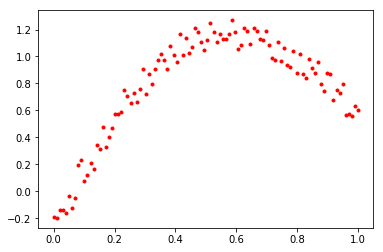

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]

lambdas = np.linspace(0,1,1000)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Task 4.1 
  * Using the above code, find the optimum regularization parameter, l. 
    * In order to do so, you will need to decide on a suitable list of l values. 
    * Pick at most 1000 values! 
    * Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Correct results including plots. The chosen lambdas may not cover the range [0,1] appropriately and plots may not show very clear examples of over/underfitting.
  * Exemplary: Correct results, suitable range of <=1000 lambdas, plots clearly showing under+overfitting.

Text(0.5,1,'Ein and Eout for lambda > 0')

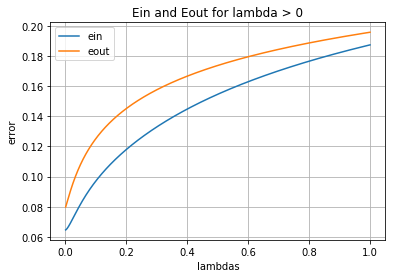

In [9]:
# plot ein, eout for lambda > 0
plt.plot(lambdas[1:],ein[1:], label='ein')
plt.plot(lambdas[1:],eout[1:], label='eout')

plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)
plt.title("Ein and Eout for lambda > 0")


The graph is showing that the lowest Ein and Eout are obtained with the **lowest lambda**.
Interestingly the Eout and Ein curves sometimes cross resulting in Eout being lower than Ein when lambda tends towards 1

In [10]:
lowest_eout_index = np.argmin(eout)
best_lambda = lambdas[lowest_eout_index]

print("lowest_eout_index          :", lowest_eout_index)
print("Best lambda used           :", best_lambda)
print("Eout without regularization:", eout[0])
print("Eout with regularization   :", eout[lowest_eout_index])
print("Difference                 :", eout[0] - eout[lowest_eout_index])

lowest_eout_index          : 1
Best lambda used           : 0.001001001001001001
Eout without regularization: 0.6105293219392258
Eout with regularization   : 0.07979502882490586
Difference                 : 0.53073429311432


# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

#### Rubric
See task 4.1 above

Text(0.5,1,'Eout by lambda (where lambda> 0)')

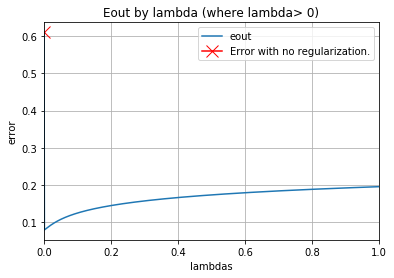

In [11]:
plt.plot(lambdas, eout, label='eout')
plt.plot(lambdas[0], eout[0], marker='x', color='red',  markersize=12, label="Error with no regularization.")
plt.xlim(0,1)
plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)

plt.title("Eout by lambda (where lambda> 0)")


In [12]:
def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


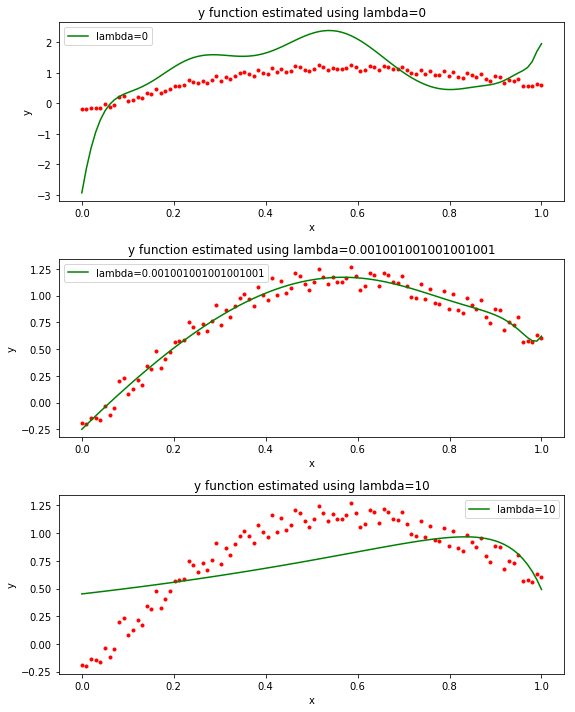

In [13]:
lambdas = np.linspace(0,1,1000)

def experiment(order, l):
#    X_trans = transPoly(X,order)

    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)

    weights = weights_reg(X_train,y_train,l)
    ein = calc_error(weights, X_train,y_train)
    eout = calc_error(weights, X_test,y_test)
    
    return ein, eout, weights

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()



# Task 5
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. 
  * Note that the data set provided is ordered by increasing X.
  
#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Full implementation of 10-fold CV yielding valid lambda and Eout.
  * Exemplary: Full implementation of 10-fold CV yielding valid lamda, Eout and plots of over/under/optimal fitting.  

##### NOTE: the implementation below is naive. Please scroll down to the next cell to see a more advanced implementation which is highly inspired by Chelliah Kanthanathan 

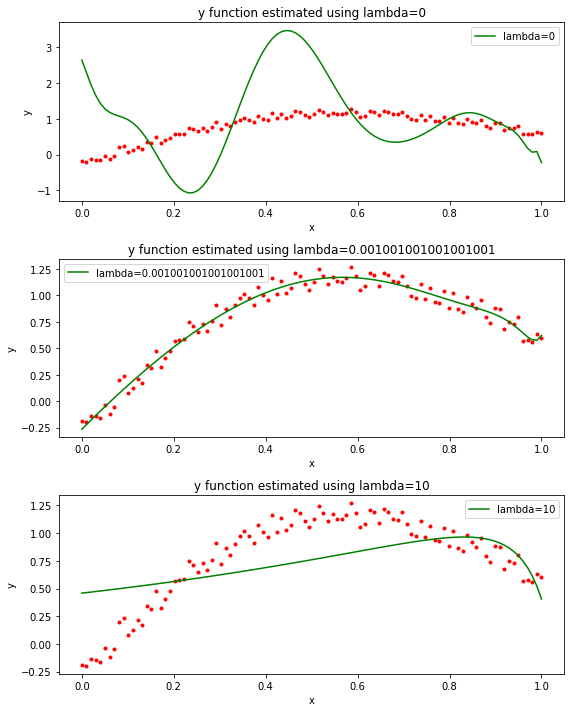

In [14]:
lambdas = np.linspace(0,1,1000)

def experiment(order, l):
    ein=[]
    eout=[]
    weights=[]
    
    # TODO: Medidate on Pep's hint: random_state fixed to get reproducible (and 'good'! :-)) results
    #kf = KFold(n_splits=10)
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # Validation. Find the lowest Eout and best lambda
    lowest_eout_index = np.argmin(eout)
    best_lambda = lambdas[lowest_eout_index]

    return ein[lowest_eout_index], eout[lowest_eout_index], weights[lowest_eout_index]

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]

for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()



#### Implementation inspired by Chelliah Kanthanathan 
I think I still need to split the data set before running the KFold algorithm. As far as I understand we should hold out a portion of the data set so that we can evaluate the final model on it. This presents the advantage of getting an Eout which is totally unbiased. The only risk here is that, since we have only a small data set we might underfit as a result.

More information regarding holding out a portion of the data set for evaluating the final model: https://machinelearningmastery.com/difference-test-validation-datasets/

In [15]:
#
# REDO - Following Chells code
#

lambdas = np.linspace(0,1,1000)

def get_eval(order, l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    Eval = np.mean(eout)
    print("Lambda:{} Eval: {}".format(l, Eval))
    return Eval


def experiment(order, l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # Validation. Find the lowest Eout and best lambda
    lowest_eout_index = np.argmin(eout)
    best_lambda = lambdas[lowest_eout_index]

    return ein[lowest_eout_index], eout[lowest_eout_index], weights[lowest_eout_index]
    


all_eval = []

for l in lambdas:
    my_eval = get_eval(50, l)
    all_eval.append(my_eval)

# Validation. Find the Eval and best lambda
lowest_eout_index = np.argmin(all_eval)
best_lambda = lambdas[lowest_eout_index]
print("\nlowest_eout_index:{} best_lambda:{}".format(lowest_eout_index, best_lambda))




Lambda:0.0 Eval: 3.955026448853907
Lambda:0.001001001001001001 Eval: 0.07300362036319706
Lambda:0.002002002002002002 Eval: 0.07251361040962526
Lambda:0.003003003003003003 Eval: 0.07236042109785651
Lambda:0.004004004004004004 Eval: 0.07234592918099662
Lambda:0.005005005005005005 Eval: 0.07241129730953504
Lambda:0.006006006006006006 Eval: 0.07253114932288504
Lambda:0.007007007007007007 Eval: 0.0726920397890269
Lambda:0.008008008008008008 Eval: 0.07288580254068677
Lambda:0.009009009009009009 Eval: 0.07310695825661731
Lambda:0.01001001001001001 Eval: 0.0733515380749403
Lambda:0.011011011011011011 Eval: 0.07361648935033878
Lambda:0.012012012012012012 Eval: 0.07389935073575667
Lambda:0.013013013013013013 Eval: 0.07419806340581492
Lambda:0.014014014014014014 Eval: 0.0745108559657449
Lambda:0.015015015015015015 Eval: 0.07483617145061025
Lambda:0.016016016016016016 Eval: 0.07517261942893749
Lambda:0.017017017017017015 Eval: 0.0755189436160694
Lambda:0.018018018018018018 Eval: 0.0758739993503827

Lambda:0.16416416416416416 Eval: 0.11406989486556555
Lambda:0.16516516516516516 Eval: 0.11422539971603593
Lambda:0.16616616616616617 Eval: 0.11438029191845216
Lambda:0.16716716716716717 Eval: 0.11453458071560194
Lambda:0.16816816816816815 Eval: 0.11468827518735483
Lambda:0.16916916916916916 Eval: 0.11484138425350857
Lambda:0.17017017017017017 Eval: 0.11499391667657852
Lambda:0.17117117117117117 Eval: 0.1151458810645242
Lambda:0.17217217217217218 Eval: 0.11529728587341843
Lambda:0.17317317317317318 Eval: 0.11544813941006091
Lambda:0.17417417417417416 Eval: 0.11559844983453713
Lambda:0.17517517517517517 Eval: 0.11574822516270948
Lambda:0.17617617617617617 Eval: 0.11589747326867553
Lambda:0.17717717717717718 Eval: 0.11604620188715271
Lambda:0.1781781781781782 Eval: 0.11619441861583213
Lambda:0.17917917917917917 Eval: 0.1163421309176598
Lambda:0.18018018018018017 Eval: 0.11648934612308495
Lambda:0.18118118118118118 Eval: 0.116636071432256
Lambda:0.18218218218218218 Eval: 0.1167823139171670

Lambda:0.33933933933933935 Eval: 0.13622036943190832
Lambda:0.34034034034034033 Eval: 0.136328854446857
Lambda:0.34134134134134136 Eval: 0.1364371759664082
Lambda:0.34234234234234234 Eval: 0.1365453341084785
Lambda:0.3433433433433433 Eval: 0.13665332898989865
Lambda:0.34434434434434436 Eval: 0.13676116072655864
Lambda:0.34534534534534533 Eval: 0.13686882943354842
Lambda:0.34634634634634637 Eval: 0.1369763352252866
Lambda:0.34734734734734735 Eval: 0.1370836782156545
Lambda:0.3483483483483483 Eval: 0.1371908585181172
Lambda:0.34934934934934936 Eval: 0.13729787624584633
Lambda:0.35035035035035034 Eval: 0.13740473151183358
Lambda:0.35135135135135137 Eval: 0.13751142442900277
Lambda:0.35235235235235235 Eval: 0.13761795511031635
Lambda:0.3533533533533533 Eval: 0.13772432366887913
Lambda:0.35435435435435436 Eval: 0.13783053021803437
Lambda:0.35535535535535534 Eval: 0.13793657487146133
Lambda:0.3563563563563564 Eval: 0.13804245774326523
Lambda:0.35735735735735735 Eval: 0.13814817894806142
Lamb

Lambda:0.5365365365365365 Eval: 0.15464082174179475
Lambda:0.5375375375375375 Eval: 0.1547206430861896
Lambda:0.5385385385385385 Eval: 0.15480034355879518
Lambda:0.5395395395395395 Eval: 0.15487992343168036
Lambda:0.5405405405405406 Eval: 0.1549593829766719
Lambda:0.5415415415415415 Eval: 0.155038722465348
Lambda:0.5425425425425425 Eval: 0.15511794216903005
Lambda:0.5435435435435435 Eval: 0.1551970423587786
Lambda:0.5445445445445445 Eval: 0.15527602330538454
Lambda:0.5455455455455456 Eval: 0.15535488527936417
Lambda:0.5465465465465466 Eval: 0.15543362855095239
Lambda:0.5475475475475475 Eval: 0.1555122533900968
Lambda:0.5485485485485485 Eval: 0.1555907600664508
Lambda:0.5495495495495496 Eval: 0.15566914884936978
Lambda:0.5505505505505506 Eval: 0.15574742000790215
Lambda:0.5515515515515516 Eval: 0.15582557381078754
Lambda:0.5525525525525525 Eval: 0.1559036105264457
Lambda:0.5535535535535535 Eval: 0.15598153042297705
Lambda:0.5545545545545546 Eval: 0.15605933376815423
Lambda:0.55555555555

Lambda:0.7227227227227228 Eval: 0.16767598516600432
Lambda:0.7237237237237237 Eval: 0.16773756491134945
Lambda:0.7247247247247247 Eval: 0.16779906673823414
Lambda:0.7257257257257257 Eval: 0.16786049082982318
Lambda:0.7267267267267267 Eval: 0.16792183736878827
Lambda:0.7277277277277278 Eval: 0.16798310653730375
Lambda:0.7287287287287287 Eval: 0.16804429851705302
Lambda:0.7297297297297297 Eval: 0.16810541348922417
Lambda:0.7307307307307307 Eval: 0.16816645163451527
Lambda:0.7317317317317317 Eval: 0.16822741313313258
Lambda:0.7327327327327328 Eval: 0.16828829816479302
Lambda:0.7337337337337337 Eval: 0.1683491069087239
Lambda:0.7347347347347347 Eval: 0.16840983954366578
Lambda:0.7357357357357357 Eval: 0.168470496247871
Lambda:0.7367367367367368 Eval: 0.16853107719910626
Lambda:0.7377377377377378 Eval: 0.16859158257465287
Lambda:0.7387387387387387 Eval: 0.16865201255130888
Lambda:0.7397397397397397 Eval: 0.16871236730538824
Lambda:0.7407407407407407 Eval: 0.16877264701272315
Lambda:0.741741

Lambda:0.8878878878878879 Eval: 0.17690327427338318
Lambda:0.8888888888888888 Eval: 0.17695414182501074
Lambda:0.8898898898898899 Eval: 0.1770049557333751
Lambda:0.8908908908908909 Eval: 0.1770557161139247
Lambda:0.8918918918918919 Eval: 0.17710642308178098
Lambda:0.8928928928928929 Eval: 0.1771570767517433
Lambda:0.8938938938938938 Eval: 0.1772076772382875
Lambda:0.8948948948948949 Eval: 0.17725822465556676
Lambda:0.8958958958958959 Eval: 0.17730871911741397
Lambda:0.8968968968968969 Eval: 0.17735916073734154
Lambda:0.8978978978978979 Eval: 0.177409549628543
Lambda:0.8988988988988988 Eval: 0.17745988590389292
Lambda:0.8998998998998999 Eval: 0.17751016967594987
Lambda:0.9009009009009009 Eval: 0.17756040105695406
Lambda:0.9019019019019019 Eval: 0.1776105801588323
Lambda:0.9029029029029029 Eval: 0.1776607070931952
Lambda:0.9039039039039038 Eval: 0.17771078197134088
Lambda:0.9049049049049049 Eval: 0.17776080490425455
Lambda:0.9059059059059059 Eval: 0.17781077600260956
Lambda:0.90690690690

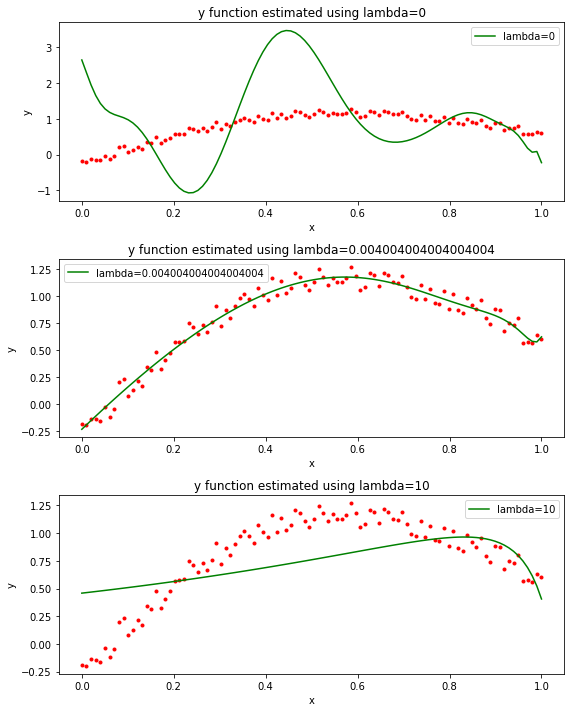

In [16]:

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]

for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()


<span style="color:red">Consider shuffling the X_trans.</span>

# Task 6 (CE6002)
  * Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

  * Observe the resulting Eout, and l compare these to previous results. 
    * What do you see? 
    * Is this what you expected?
  * Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

#### Rubric
  * Beginning: Incorrect use of LassoCV and Ridge CV.
  * Developing: Incorrect use of LassCV or RidgeCV.
  * Accomplished: LassoCV and RidgeCV used correctly. Valid commentary on difference in lambda obtained in Task 1,2.
  * Exemplary: Correct use of Lasso&RidgeCV. Valid commentary on lambda including insights in the differences with Task 1,2 relating to the ability to approximate Eout correctly.

Reference: 
  * https://scikit-learn.org/stable/auto_examples/cluster/plot_feature_agglomeration_vs_univariate_selection.html#sphx-glr-auto-examples-cluster-plot-feature-agglomeration-vs-univariate-selection-py
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
  * https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b 
    * Describes how RidgeVC and LassoCV perform better at reducting over-fitting compared to simple Linear regression. 

What is the difference between Ridge and RidgeCV?
  * https://stats.stackexchange.com/questions/262640/the-results-of-cv-on-ridge-are-different-than-the-results-of-ridgecv

In [17]:
def alternate_regression(title, clf):
    score = clf.score(X_trans, y) 
    pred = clf.predict(X_trans)
    params = clf.get_params
    lambdas = clf.alpha_ 
    coeffs = clf.coef_

    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = title
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    print("score  :", score)
    print("params :", params)
    print("pred   :", pred)
    print("lambdas:", lambdas)
    print("coefs  :", coeffs)

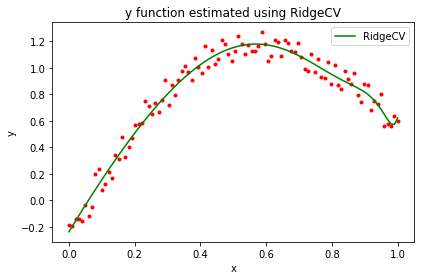

score  : 0.9708970605038848
params : <bound method BaseEstimator.get_params of RidgeCV(alphas=[0.004004004004004004, 0.001, 0.01, 0.1, 1], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)>
pred   : [-0.23848678 -0.19734599 -0.15650057 -0.11596257 -0.0757443  -0.03585835
  0.00368241  0.0428648   0.0816754   0.12010045  0.15812592  0.19573749
  0.23292054  0.26966013  0.30594104  0.34174775  0.37706442  0.41187494
  0.44616287  0.47991149  0.51310379  0.54572246  0.57774992  0.6091683
  0.63995945  0.67010499  0.69958627  0.72838441  0.7564803   0.78385464
  0.81048792  0.83636048  0.86145253  0.88574416  0.90921538  0.93184615
  0.95361643  0.97450622  0.99449562  1.01356485  1.03169436  1.04886485
  1.06505737  1.08025341  1.09443498  1.10758471  1.11968594  1.1307229
  1.14068078  1.14954591  1.15730592  1.16394992  1.16946866  1.17385479
  1.17710303  1.17921047  1.18017682  1.18000467  1.17869985  1.1762717
  1.17273351  1.16

In [18]:
clf = RidgeCV(alphas=[best_lambda, 1e-3, 1e-2, 1e-1, 1]).fit(X_trans, y)
alternate_regression("RidgeCV", clf)

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


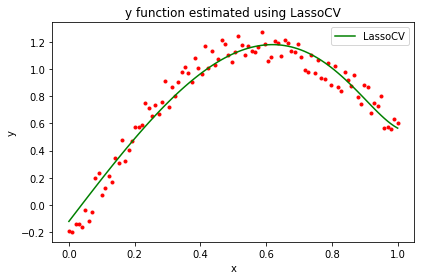

score  : 0.9524855260849847
params : <bound method BaseEstimator.get_params of LassoCV(alphas=[0.001, 0.01, 0.1, 1], copy_X=True, cv=10, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=0,
    selection='cyclic', tol=0.0001, verbose=False)>
pred   : [-0.11979156 -0.08797194 -0.05616932 -0.0244007   0.00731692  0.03896653
  0.07053113  0.10199373  0.13333733  0.16454491  0.19559949  0.22648405
  0.2571816   0.28767514  0.31794767  0.34798218  0.37776168  0.40726916
  0.43648762  0.46540007  0.49398949  0.52223889  0.55013127  0.57764963
  0.60477696  0.63149627  0.65779056  0.68364281  0.70903604  0.73395325
  0.75837743  0.78229158  0.80567871  0.82852182  0.85080391  0.87250799
  0.89361707  0.91411417  0.93398228  0.95320445  0.97176369  0.98964305
  1.00682557  1.02329432  1.03903239  1.05402287  1.0682489   1.08169365
  1.09434032  1.10617219  1.11717258  1.12732488  1.1366126   1.14501935

In [19]:
#clf = LassoCV(cv=10, random_state=0).fit(X_trans, y)
clf = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=10, random_state=0).fit(X_trans, y)


alternate_regression("LassoCV", clf)

<span style="color:red">Play with the parameters to remove the warning !!!!</span>